In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
import numpy as np
import seaborn as sns


from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load MNIST
(x_train, y_train), (x_test,y_test) = mnist.load_data()

# Normalize train data (Scale data between 0 and 1)
x_train = x_train.astype('float32') / 255. # x_train.max() = 255
x_test = x_test.astype('float32') / 255.

# Reshape
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)


In [3]:
class Autoencoder(keras.Model):
    def __init__(self, bottle_neck):
        super(Autoencoder, self).__init__()
        self.bottle_neck = bottle_neck
        
        glorot= tf.keras.initializers.GlorotUniform()
        # Encoder
        self.encoder = Sequential([Input(28*28),
                                   Dense(50, kernel_initializer=glorot, activation="relu"), # Layer 2
                                  Dense(self.bottle_neck, kernel_initializer=glorot, activation="relu")]) # Layer 3
        # Decoder
        self.decoder = Sequential([Dense(28*28, kernel_initializer=glorot, activation="relu")])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [4]:
# Initialize encoders
autoencoder1 = Autoencoder(2)
autoencoder2 = Autoencoder(4)

# Compile encoders
adam = Adam(learning_rate=0.001)
autoencoder1.compile(optimizer=adam, loss="mse")
autoencoder2.compile(optimizer=adam, loss="mse")

In [5]:
# Fit encoders
epochs = 800
batch_size=8192
autoencoder1.fit(x_train, x_train, epochs=epochs,batch_size=batch_size, shuffle=True,validation_data=(x_test, y_test))
autoencoder2.fit(x_train, x_train, epochs=epochs,batch_size=batch_size, shuffle=True,validation_data=(x_test, y_test))

Epoch 1/800
8/8 [==============================] - 1s 73ms/step - loss: 0.1053 - val_loss: 27.5300
Epoch 2/800
8/8 [==============================] - 0s 58ms/step - loss: 0.0981 - val_loss: 27.5796
Epoch 3/800
8/8 [==============================] - 0s 59ms/step - loss: 0.0920 - val_loss: 27.4305
Epoch 4/800
8/8 [==============================] - 0s 62ms/step - loss: 0.0865 - val_loss: 27.3879
Epoch 5/800
8/8 [==============================] - 1s 62ms/step - loss: 0.0821 - val_loss: 27.3340
Epoch 6/800
8/8 [==============================] - 1s 63ms/step - loss: 0.0792 - val_loss: 27.3263
Epoch 7/800
8/8 [==============================] - 1s 63ms/step - loss: 0.0775 - val_loss: 27.3047
Epoch 8/800
8/8 [==============================] - 1s 63ms/step - loss: 0.0765 - val_loss: 27.3063
Epoch 9/800
8/8 [==============================] - 1s 62ms/step - loss: 0.0761 - val_loss: 27.3032
Epoch 10/800
8/8 [==============================] - 1s 64ms/step - loss: 0.0759 - val_loss: 27.3021
Epoch 11/

Epoch 83/800
8/8 [==============================] - 0s 59ms/step - loss: 0.0703 - val_loss: 27.3254
Epoch 84/800
8/8 [==============================] - 0s 62ms/step - loss: 0.0703 - val_loss: 27.3254
Epoch 85/800
8/8 [==============================] - 0s 61ms/step - loss: 0.0703 - val_loss: 27.3254
Epoch 86/800
8/8 [==============================] - 0s 60ms/step - loss: 0.0703 - val_loss: 27.3269
Epoch 87/800
8/8 [==============================] - 0s 59ms/step - loss: 0.0703 - val_loss: 27.3268
Epoch 88/800
8/8 [==============================] - 1s 65ms/step - loss: 0.0703 - val_loss: 27.3270
Epoch 89/800
8/8 [==============================] - 1s 66ms/step - loss: 0.0702 - val_loss: 27.3277
Epoch 90/800
8/8 [==============================] - 0s 60ms/step - loss: 0.0702 - val_loss: 27.3283
Epoch 91/800
8/8 [==============================] - 1s 64ms/step - loss: 0.0702 - val_loss: 27.3286
Epoch 92/800
8/8 [==============================] - 1s 65ms/step - loss: 0.0702 - val_loss: 27.3288


8/8 [==============================] - 1s 62ms/step - loss: 0.0693 - val_loss: 27.3745
Epoch 246/800
8/8 [==============================] - 1s 63ms/step - loss: 0.0693 - val_loss: 27.3773
Epoch 247/800
8/8 [==============================] - 1s 74ms/step - loss: 0.0693 - val_loss: 27.3767
Epoch 248/800
8/8 [==============================] - 0s 61ms/step - loss: 0.0693 - val_loss: 27.3731
Epoch 249/800
8/8 [==============================] - 0s 62ms/step - loss: 0.0693 - val_loss: 27.3757
Epoch 250/800
8/8 [==============================] - 0s 59ms/step - loss: 0.0693 - val_loss: 27.3745
Epoch 251/800
8/8 [==============================] - 0s 60ms/step - loss: 0.0693 - val_loss: 27.3747
Epoch 252/800
8/8 [==============================] - 1s 63ms/step - loss: 0.0693 - val_loss: 27.3759
Epoch 253/800
8/8 [==============================] - 1s 64ms/step - loss: 0.0693 - val_loss: 27.3748
Epoch 254/800
8/8 [==============================] - 1s 69ms/step - loss: 0.0693 - val_loss: 27.3725
Epoc

8/8 [==============================] - 0s 59ms/step - loss: 0.0687 - val_loss: 27.3679
Epoch 408/800
8/8 [==============================] - 0s 58ms/step - loss: 0.0687 - val_loss: 27.3640
Epoch 409/800
8/8 [==============================] - 0s 58ms/step - loss: 0.0687 - val_loss: 27.3693
Epoch 410/800
8/8 [==============================] - 0s 58ms/step - loss: 0.0687 - val_loss: 27.3637
Epoch 411/800
8/8 [==============================] - 0s 58ms/step - loss: 0.0687 - val_loss: 27.3678
Epoch 412/800
8/8 [==============================] - 0s 59ms/step - loss: 0.0687 - val_loss: 27.3655
Epoch 413/800
8/8 [==============================] - 0s 58ms/step - loss: 0.0687 - val_loss: 27.3661
Epoch 414/800
8/8 [==============================] - 0s 58ms/step - loss: 0.0687 - val_loss: 27.3668
Epoch 415/800
8/8 [==============================] - 0s 57ms/step - loss: 0.0687 - val_loss: 27.3688
Epoch 416/800
8/8 [==============================] - 0s 59ms/step - loss: 0.0687 - val_loss: 27.3662
Epoc

8/8 [==============================] - 0s 62ms/step - loss: 0.0685 - val_loss: 27.3668
Epoch 570/800
8/8 [==============================] - 0s 60ms/step - loss: 0.0685 - val_loss: 27.3673
Epoch 571/800
8/8 [==============================] - 0s 60ms/step - loss: 0.0685 - val_loss: 27.3673
Epoch 572/800
8/8 [==============================] - 0s 60ms/step - loss: 0.0685 - val_loss: 27.3676
Epoch 573/800
8/8 [==============================] - 0s 61ms/step - loss: 0.0685 - val_loss: 27.3687
Epoch 574/800
8/8 [==============================] - 0s 60ms/step - loss: 0.0685 - val_loss: 27.3655
Epoch 575/800
8/8 [==============================] - 0s 61ms/step - loss: 0.0685 - val_loss: 27.3666
Epoch 576/800
8/8 [==============================] - 0s 59ms/step - loss: 0.0685 - val_loss: 27.3670
Epoch 577/800
8/8 [==============================] - 0s 62ms/step - loss: 0.0685 - val_loss: 27.3675
Epoch 578/800
8/8 [==============================] - 0s 61ms/step - loss: 0.0685 - val_loss: 27.3684
Epoc

8/8 [==============================] - 1s 70ms/step - loss: 0.0685 - val_loss: 27.3673
Epoch 732/800
8/8 [==============================] - 1s 69ms/step - loss: 0.0684 - val_loss: 27.3668
Epoch 733/800
8/8 [==============================] - 0s 60ms/step - loss: 0.0684 - val_loss: 27.3668
Epoch 734/800
8/8 [==============================] - 0s 62ms/step - loss: 0.0684 - val_loss: 27.3700
Epoch 735/800
8/8 [==============================] - 0s 61ms/step - loss: 0.0685 - val_loss: 27.3664
Epoch 736/800
8/8 [==============================] - 0s 59ms/step - loss: 0.0684 - val_loss: 27.3680
Epoch 737/800
8/8 [==============================] - 1s 66ms/step - loss: 0.0684 - val_loss: 27.3694
Epoch 738/800
8/8 [==============================] - 1s 69ms/step - loss: 0.0684 - val_loss: 27.3670
Epoch 739/800
8/8 [==============================] - 1s 69ms/step - loss: 0.0684 - val_loss: 27.3663
Epoch 740/800
8/8 [==============================] - 1s 65ms/step - loss: 0.0685 - val_loss: 27.3711
Epoc

Epoch 94/800
8/8 [==============================] - 1s 71ms/step - loss: 0.0522 - val_loss: 27.1612
Epoch 95/800
8/8 [==============================] - 1s 68ms/step - loss: 0.0522 - val_loss: 27.1605
Epoch 96/800
8/8 [==============================] - 1s 68ms/step - loss: 0.0522 - val_loss: 27.1576
Epoch 97/800
8/8 [==============================] - 1s 64ms/step - loss: 0.0522 - val_loss: 27.1620
Epoch 98/800
8/8 [==============================] - 1s 69ms/step - loss: 0.0522 - val_loss: 27.1581
Epoch 99/800
8/8 [==============================] - 1s 65ms/step - loss: 0.0522 - val_loss: 27.1632
Epoch 100/800
8/8 [==============================] - 1s 65ms/step - loss: 0.0522 - val_loss: 27.1595
Epoch 101/800
8/8 [==============================] - 1s 68ms/step - loss: 0.0522 - val_loss: 27.1601
Epoch 102/800
8/8 [==============================] - 1s 63ms/step - loss: 0.0522 - val_loss: 27.1620
Epoch 103/800
8/8 [==============================] - 1s 63ms/step - loss: 0.0522 - val_loss: 27.1

8/8 [==============================] - 1s 62ms/step - loss: 0.0512 - val_loss: 27.2012
Epoch 257/800
8/8 [==============================] - 0s 62ms/step - loss: 0.0512 - val_loss: 27.2007
Epoch 258/800
8/8 [==============================] - 0s 61ms/step - loss: 0.0512 - val_loss: 27.2026
Epoch 259/800
8/8 [==============================] - 0s 61ms/step - loss: 0.0512 - val_loss: 27.2042
Epoch 260/800
8/8 [==============================] - 0s 61ms/step - loss: 0.0512 - val_loss: 27.2047
Epoch 261/800
8/8 [==============================] - 0s 61ms/step - loss: 0.0512 - val_loss: 27.1999
Epoch 262/800
8/8 [==============================] - 0s 61ms/step - loss: 0.0512 - val_loss: 27.1991
Epoch 263/800
8/8 [==============================] - 0s 62ms/step - loss: 0.0512 - val_loss: 27.2009
Epoch 264/800
8/8 [==============================] - 0s 61ms/step - loss: 0.0512 - val_loss: 27.2047
Epoch 265/800
8/8 [==============================] - 0s 62ms/step - loss: 0.0512 - val_loss: 27.2031
Epoc

8/8 [==============================] - 0s 60ms/step - loss: 0.0508 - val_loss: 27.2137
Epoch 419/800
8/8 [==============================] - 0s 61ms/step - loss: 0.0507 - val_loss: 27.2180
Epoch 420/800
8/8 [==============================] - 0s 60ms/step - loss: 0.0507 - val_loss: 27.2133
Epoch 421/800
8/8 [==============================] - 0s 60ms/step - loss: 0.0507 - val_loss: 27.2122
Epoch 422/800
8/8 [==============================] - 0s 60ms/step - loss: 0.0507 - val_loss: 27.2142
Epoch 423/800
8/8 [==============================] - 0s 61ms/step - loss: 0.0507 - val_loss: 27.2175
Epoch 424/800
8/8 [==============================] - 0s 61ms/step - loss: 0.0507 - val_loss: 27.2161
Epoch 425/800
8/8 [==============================] - 0s 60ms/step - loss: 0.0507 - val_loss: 27.2185
Epoch 426/800
8/8 [==============================] - 1s 64ms/step - loss: 0.0507 - val_loss: 27.2128
Epoch 427/800
8/8 [==============================] - 0s 59ms/step - loss: 0.0507 - val_loss: 27.2147
Epoc

8/8 [==============================] - 0s 61ms/step - loss: 0.0506 - val_loss: 27.2227
Epoch 581/800
8/8 [==============================] - 0s 61ms/step - loss: 0.0506 - val_loss: 27.2191
Epoch 582/800
8/8 [==============================] - 0s 61ms/step - loss: 0.0506 - val_loss: 27.2157
Epoch 583/800
8/8 [==============================] - 0s 60ms/step - loss: 0.0506 - val_loss: 27.2173
Epoch 584/800
8/8 [==============================] - 0s 60ms/step - loss: 0.0506 - val_loss: 27.2157
Epoch 585/800
8/8 [==============================] - 0s 60ms/step - loss: 0.0506 - val_loss: 27.2180
Epoch 586/800
8/8 [==============================] - 0s 60ms/step - loss: 0.0506 - val_loss: 27.2163
Epoch 587/800
8/8 [==============================] - 0s 62ms/step - loss: 0.0506 - val_loss: 27.2159
Epoch 588/800
8/8 [==============================] - 0s 61ms/step - loss: 0.0506 - val_loss: 27.2176
Epoch 589/800
8/8 [==============================] - 0s 60ms/step - loss: 0.0506 - val_loss: 27.2186
Epoc

8/8 [==============================] - 0s 57ms/step - loss: 0.0506 - val_loss: 27.2215
Epoch 743/800
8/8 [==============================] - 0s 58ms/step - loss: 0.0505 - val_loss: 27.2242
Epoch 744/800
8/8 [==============================] - 0s 57ms/step - loss: 0.0505 - val_loss: 27.2231
Epoch 745/800
8/8 [==============================] - 0s 57ms/step - loss: 0.0505 - val_loss: 27.2195
Epoch 746/800
8/8 [==============================] - 0s 58ms/step - loss: 0.0505 - val_loss: 27.2166
Epoch 747/800
8/8 [==============================] - 0s 58ms/step - loss: 0.0505 - val_loss: 27.2177
Epoch 748/800
8/8 [==============================] - 0s 57ms/step - loss: 0.0505 - val_loss: 27.2244
Epoch 749/800
8/8 [==============================] - 0s 57ms/step - loss: 0.0505 - val_loss: 27.2227
Epoch 750/800
8/8 [==============================] - 0s 58ms/step - loss: 0.0505 - val_loss: 27.2248
Epoch 751/800
8/8 [==============================] - 0s 57ms/step - loss: 0.0505 - val_loss: 27.2220
Epoc

## Montage for encoder 1 and 2

In [6]:
def plotEncoder(encoded_imgs,decoded_imgs):
    n = len(encoded_imgs)
    plt.figure(figsize=(20, 4))
    for i in range(n):

        # display original + noise
        ax = plt.subplot(2, n, i + 1)
        plt.title("original")
        #plt.imshow(tf.squeeze(x_test[i].reshape([28,28])))
        plt.imshow(x_test[index_list][i].reshape([28,28]))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        bx = plt.subplot(2, n, i + n + 1)
        plt.title("reconstructed")
        plt.imshow(tf.squeeze(decoded_imgs[i]))
        plt.gray()
        bx.get_xaxis().set_visible(False)
        bx.get_yaxis().set_visible(False)
    plt.show()

### Encoder 1

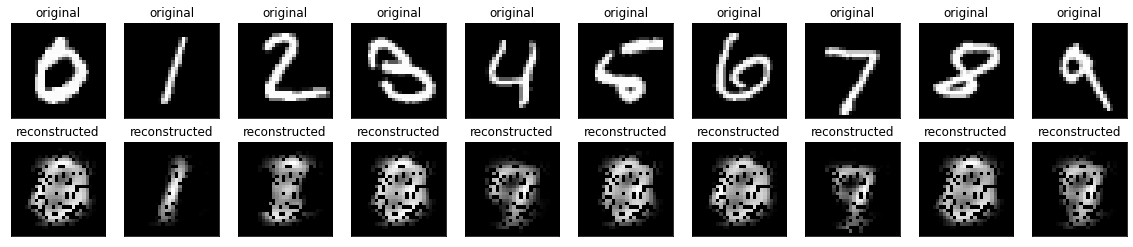

In [7]:
#List of index with number
index_list = [list(np.where(y_test==i))[0][0] for i in range(0,10)]


encoded_imgs = autoencoder1.encoder(x_test[index_list]).numpy()
decoded_imgs = autoencoder1.decoder(encoded_imgs).numpy().reshape([-1,28,28])

plotEncoder(encoded_imgs,decoded_imgs)

### Encoder 2

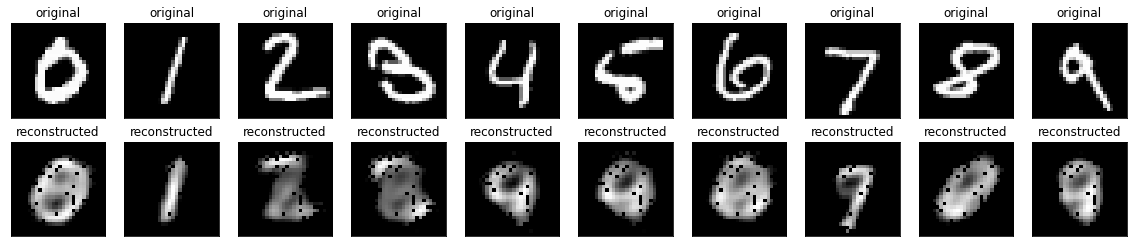

In [8]:
encoded_imgs = autoencoder2.encoder(x_test[index_list]).numpy()
decoded_imgs = autoencoder2.decoder(encoded_imgs).numpy().reshape([-1,28,28])

plotEncoder(encoded_imgs,decoded_imgs)

### Make scatter plot from Encoder (Autoencoder 1)

In [9]:
encode1 =autoencoder1.encoder(x_train)

In [10]:
n11 = np.array(encode1[:,0])
n12 = np.array(encode1[:,1])

In [11]:
index_list = [list(np.where(y_test==i))[0][0] for i in range(0,10)]

<AxesSubplot:>

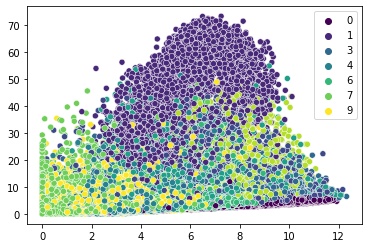

In [12]:
sns.scatterplot(x=n11,y=n12,hue=y_train,palette="viridis")

<AxesSubplot:>

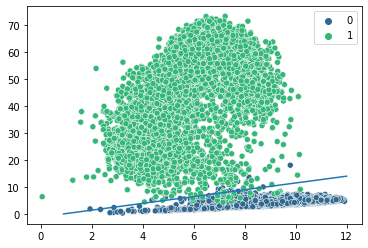

In [33]:
first_values = np.where(y_train==0)[0]
second_values = np.where(y_train==1)[0]
plot_values = np.hstack((first_values,second_values))

x = [0.9,12]
y = [0,14]
plt.plot(x,y)

sns.scatterplot(x=n11[plot_values],y=n12[plot_values],hue=y_train[plot_values],palette="viridis")

### Make scatter plot from Encoder (Autoencoder 2)

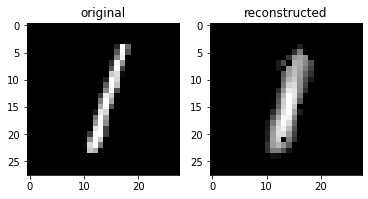

In [14]:
number = 1
plot_number = list(np.where(y_test==number))[0][0] 

encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
decoded_imgs = autoencoder2.decoder(encoded_imgs).numpy().reshape([-1,28,28])

plt.subplot(1,2,1)
plt.title("original")
plt.imshow(x_test[plot_number].reshape(28,28))

plt.subplot(1,2,2)
plt.title("reconstructed")
plt.imshow(decoded_imgs[0])

plt.show()

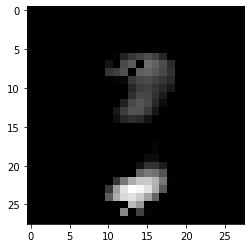

In [15]:
Test =np.array([[10.038726, 22.527847 , 30.6352916, 40.891455 ]])
decoded_imgs = autoencoder2.decoder(Test).numpy().reshape([-1,28,28])
plt.imshow(decoded_imgs[0])

### Output from encoder

In [34]:
number = 0
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[3.8768482, 6.614709 , 4.2385807, 3.1260583]], dtype=float32)

In [35]:
number = 1
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[19.029282 ,  2.8813946,  5.817218 , 24.564314 ]], dtype=float32)

In [36]:
number = 2
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[1.5064843, 5.0337963, 2.0138092, 4.010527 ]], dtype=float32)

In [37]:
number = 3
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[1.4265338, 5.095628 , 3.0702674, 2.5195072]], dtype=float32)

In [38]:
number = 4
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[1.2657216, 1.3120711, 4.456349 , 1.7130327]], dtype=float32)

In [39]:
number = 5
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[1.5750134, 2.1871858, 3.3879793, 1.4297109]], dtype=float32)

In [40]:
number = 6
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[2.1973648, 4.2976236, 2.7277212, 1.6997559]], dtype=float32)

In [23]:
number = 7
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[27.759682 ,  1.7799237, 14.465729 , 17.859175 ]], dtype=float32)

In [24]:
number = 8
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[12.248258 ,  3.016937 ,  3.710522 ,  5.5838223]], dtype=float32)

In [25]:
number = 9
plot_number = list(np.where(y_test==number))[0][0] 
encoded_imgs = autoencoder2.encoder(x_test[plot_number].reshape(1,-1)).numpy()
encoded_imgs

array([[1.9595857, 3.1680152, 4.3615503, 2.950197 ]], dtype=float32)